## Homework

This week we are going to use a new data set which contains 1070 purchases where the customer either purchased Citrus Hill or Minute Maid Orange Juice. 

In [7]:
import pandas as pd
oj = pd.read_csv('/Users/patrickcullinane/Desktop/exercise4/data/OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,0,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,0,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,0,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,1,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,0,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


In [9]:
oj.data = oj.iloc[:, 1:]
oj.target = oj.iloc[:, 0]

The features and the target variable are already prepared for you. What you are going to do is:

**1. Split**

Split the data set into two parts: training set and test set(with *random_state=0*, and *test_size=1.0/2*).


In [11]:
### your solution
from sklearn import cross_validation as cv
X_train, X_test, y_train, y_test = cv.train_test_split(oj.data, oj.target, random_state=0, test_size=0.5)

**2. Support vector machine**

(1) Fit a svm model on the training set, report the training error and test error.(Just use the **svm.SVC** with default setting.)
    
(2) Change the value of parameter $C$ from $10^{-3}$ to $10^3$, make a plot to watch how the training error and test error varies. You can choose the value of $C$ from the array `np.logspace(-3, 3, 300)`.

In [12]:
### your solution
from sklearn import svm
clf = svm.SVC()

In [13]:
clf.fit(X_train, y_train)
train_error = 1 - clf.score(X_train, y_train)
test_error = 1 - clf.score(X_test, y_test)
print('train error %.3f' %train_error)
print('test error %.3f' %test_error)

train error 0.226
test error 0.303


In [14]:
import numpy as np
C = np.logspace(-3,3,300)
svm_train = []
svm_test = []
for i in C:
    clf.set_params(C = i)
    clf.fit(X_train, y_train)
    train_error = 1 - clf.score(X_train, y_train)
    test_error = 1 - clf.score(X_test, y_test)
    svm_train.append(train_error)
    svm_test.append(test_error)

Populating the interactive namespace from numpy and matplotlib


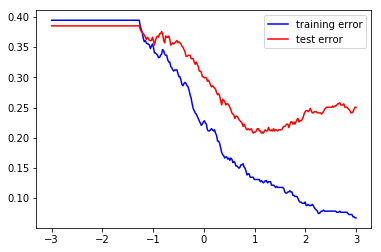

In [16]:
%pylab inline
import matplotlib.pyplot as plt
plt.plot(np.log10(C), svm_train, c='blue', label='training error')
plt.plot(np.log10(C), svm_test, c='red', label='test error')
plt.legend()

**3. Decision tree**

(1) Fit a decision tree model on the training set with the default setting.
    
(2) Set the depth of the tree from 1 to 30. Look the varies of the training error and test error.
    
(3) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [24]:
grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

(4) What are the first 5 important features?

In [25]:
### your solution
from sklearn import tree
d_tree = tree.DecisionTreeClassifier()

In [26]:
d_tree.fit(X_train, y_train)
train_error = 1 - d_tree.score(X_train, y_train)
test_error = 1 - d_tree.score(X_test, y_test)
print('train error %.3f' %train_error)
print('test error %.3f' %test_error)

train error 0.007
test error 0.247


In [30]:
depth = range(1,30)
tree_train = []
tree_test = []
for i in range(1,30):
    d_tree.set_params(max_depth = i)
    d_tree.fit(X_train, y_train)
    train_error = 1 - d_tree.score(X_train, y_train)
    test_error = 1 - d_tree.score(X_test, y_test)
    tree_train.append(train_error)
    tree_test.append(test_error)

Text(0.5,0,'depth')

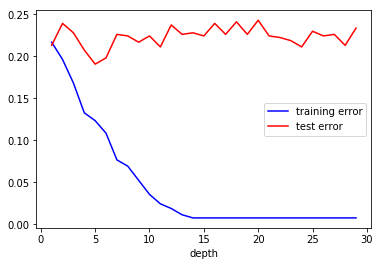

In [31]:
plt.plot(depth, tree_train, c='blue', label='training error')
plt.plot(depth, tree_test, c='red', label='test error')
plt.legend(loc=7)
plt.xlabel('depth')

In [33]:
from sklearn import grid_search as gs

In [61]:
#gs_tree = gs.GridSearchCV(d_tree, grid_para_tree, cv=5, scoring='accuracy').fit(X_train, y_train)
#grid_para_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

#gs.GridSearchCV(d_tree, grid_para_tree, cv=5, scoring='accuracy').fit(X_train, y_train)

**4. Random Forest.**

(1) Fit a random forest on the training set. Report the training error and test error.
    
(2) Use the function **grid_search.GridSearchCV** to find the best parameters. What's the best parameters? What's the best score? What's the training error and test error of the best model. The possible combination of the parameters may be:

In [2]:
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}


(3) What's the first 5 important features?

In [34]:
### your solution
from sklearn import ensemble
randomforest = ensemble.RandomForestClassifier()

In [35]:
randomforest.fit(X_train, y_train)
train_error = 1 - randomforest.score(X_train, y_train)
test_error = 1 - randomforest.score(X_test, y_test)
print('train error %.5f' %train_error)
print('test error %.5f' %test_error)

train error 0.02991
test error 0.20000


In [39]:
#grid_para_forest = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31), "n_estimators": range(10, 110, 10)}
#grid_search_forest = gs.GridSearchCV(randomforest, grid_para_forest, cv=5, scoring='accuracy').fit(train_data, train_target)
